In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# The Basics of Using Jupyter

Jupyter is an easy way for programmers and data scientists to openly share their backend (code) while also allowing for plain text (like this) to supplement what is written in the code. To use the Jupyter environment, there are a few basic things that one should know about...

* Saving and opening a notebook
* **import** (and **from**) statements
* Cell types (code and markdown)
* Cells: editing, adding/removing, running
* Kernel: interrupt, restart
* help() $\rightarrow$ SUPER HELPFUL (who would've guessed?)

# IEX API

To gain access to the API, go to https://www.iexcloud.io to create an account. Then go to https://www.iexcloud.io/console/tokens to find your API token. Unless you want to get real data, it is recommended that you turn on "Viewing Test Data" along the left panel. Any API usage while this is on will not count towards your monthly API allowance. Note that your API token changes when this option is active.

Here is an arrow-digram outlining the Portfolio creation pipeline:

\begin{equation}
\text{User input} \rightarrow \text{IEX Cloud API} \rightarrow \text{bind data to Stock object} \rightarrow \text{Portfolio object containing Stocks (and data)}
\end{equation}

# Making a Portfolio

In [2]:
p = data_collection.generate_portfolio()

NameError: name 'data_collection' is not defined

In [11]:
# Portfolio is an Ordered Dict with keys being the tickers and the values being the Stock objects.
p.stocks

OrderedDict([('NVDA', <hypar.stock.Stock at 0x14662cd0>)])

In [12]:
# Get a Stock's data.
p.stocks['NVDA']

In [13]:
# Use .<attribute> to get different pieces of data.
p.stocks['NVDA'].price_data[0] # The index is just because the dictionary is a list

{'date': '2019-03-29',
 'uClose': 180.23,
 'uOpen': 183.45,
 'uHigh': 183.1,
 'uLow': 183.82,
 'uVolume': 11438817,
 'close': 188.5,
 'open': 183.08,
 'high': 181.37,
 'low': 185.6,
 'volume': 11666451,
 'change': 0,
 'changePercent': 0,
 'label': 'Mar 29, 19',
 'changeOverTime': 0}

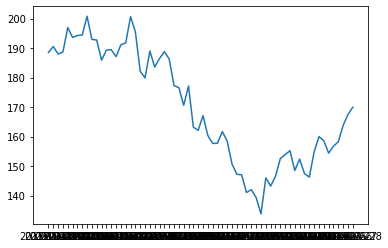

In [31]:
# Notice the above notation is not very convient, so use the following method to "slice" the data.
# Data can be returned in different formats, so use help(p.get_data_slice) to learn more about this.
d=p.get_data_slice('close', as_dict=True)['NVDA']
plt.plot(list(d.keys()),list(d.values()))

map(da)

# Plotting (all are not working temporarily, sorry)

* Time series - not currently working with new implementation (sorry)
* CDF - again, not currently working
* Spearman rank correlation heatmap

# Analysis

* Spearman rank coefficients
* Statistical moments - not currently working (sorry)

In [19]:
analysis.correlation(p) # use help() to get an understanding for how you can weight the correlations.

[['WAL', 'FB', 0.0045588235294117645],
 ['FB', 'WAL', 0.0045588235294117645],
 ['AMD', 'FB', 0.07426470588235294],
 ['FB', 'AMD', 0.07426470588235294],
 ['NVDA', 'FB', 0.07720588235294118],
 ['FB', 'NVDA', 0.07720588235294118],
 ['AMD', 'WAL', 0.08161764705882352],
 ['WAL', 'AMD', 0.08161764705882352],
 ['NVDA', 'WAL', 0.10132352941176472],
 ['WAL', 'NVDA', 0.10132352941176472],
 ['NVDA', 'AMD', 0.16102941176470587],
 ['AMD', 'NVDA', 0.16102941176470587]]

In [2]:
# The following will eventually be added to the plotting module. For now, it must be done manually.

# Randomly assign number of stocks owned
for stock in p.stocks.keys():
    p.stocks[stock].num_shares[p] = np.random.randint(1,15)

# Calculate all the weightings of correlation (i.e. regular, rank, shares, both)
b='spearman'
a=False
c=True
sh=True
r=True

reg = analysis.correlation(p, method=b, absolute=a, coeffs_only=c)
rank = analysis.correlation(p, method=b, weight_by_rank=r, absolute=a, coeffs_only=c)
shares = analysis.correlation(p, method=b, weight_by_shares=sh, absolute=a, coeffs_only=c)
both = analysis.correlation(p, method=b, weight_by_rank=r, weight_by_shares=sh, absolute=a, coeffs_only=c)

ax = sns.distplot(reg, label='Regular')
sns.distplot(rank, label='Rank')
sns.distplot(shares, label='Shares')
sns.distplot(both, label='Both')
ax.set_xlabel('Non-Absolute Correlation')
ax.set_ylabel('Number of Samples')
ax.set_title('Comparison of Non-Absolute Correlations')
ax.legend()
#plt.savefig(fname='Non-Absolute Corrs SNS', dpi=600)
plt.show()

plt.plot(reg, label='Regular')
plt.plot(rank, label='Rank')
plt.plot(shares, label='Shares')
plt.plot(both, label='Both')
plt.xlabel('Number of Samples')
plt.ylabel('Normalized Correlation')
plt.title('Comparison of Absolute Correlations')
plt.legend()
plt.savefig(fname='Absolute Corrs', dpi=600)
plt.show()

NameError: name 'p' is not defined

In [75]:
from dataclasses import dataclass, field
import datetime
from typing import List, Dict, Any


@dataclass
class StockParams(object):
    """Parameters of a StockInstance that identifies it from other
    StockInstances.

    Includes such properties as the number of shares owned and start and end
    dates of when the StockInstance is owned. Distinction of StockParams and
    StockData is necessary when dealing with a multi-Portfolio environment in
    which the number of shares and dates vary between one or more Portfolios.
    In this way, each StockInstance in one or more Portfolio can have a
    different number of shares and dates.

    Attributes:
        num_shares (int): Number of shares owned of a StockInstance.
        start_date (datetime): Starting date of the StockInstance.
        end_date (datetime): Ending date of the StockInstance.
        anonymous (bool): True of the StockInstance is to be referred to by its
            pseudonym, and otherwise implies the StockInstance to be referred
            to by its ticker symbol.
        pseudonym (str): "S-XXX" where "XXX" is a pseudo-randomly generated
            integer between 100 and 999.
    """
    start_date: datetime.datetime = None
    end_date: datetime.datetime = None
    pseudonym: str = None
    num_shares: int = 1
    anonymous: bool = False

    @property
    def __repr__(self):
        return f'{self.__class__.__name__}(ticker={self.ticker}, ' \
            f'start={self.start_date:%Y-%m-%d}, end={self.end_date:%Y-%m-%d})'

    def sort_by_start(self, stock_params):
        return stock_params.start_date

    def sort_by_end(self, stock_params):
        return stock_params.end_date

# TODO(Ryan) Specify type hints in more detail -- refer to PEP 483 and 484:
# https://www.python.org/dev/peps/pep-0483/#notational-conventions
# https://www.python.org/dev/peps/pep-0484/
@dataclass
class StockData(object):
    """Data about a Stock that is shared among all StockInstances of a Stock.

    Collection of data that is parsed among all StockInstances that, together,
    signifies the Stock activity during the date ranges in which it is owned.
    There may be regions of data that are not accessed if no StockInstance
    exists within that region of time.

    Attributes:
        ticker (str): Ticker symbol of the Stock.
        interday_pricing (List[Dict[str, Any]]): Daily adjusted and
        unadjusted price and volume information.
        balance_sheet (Dict[str, Any]): Balance sheet information of the most
            recent available quarter.
        book (Dict[str, Any]): Book data.
        cash_flow (Dict[str, Any]): Cash flow information of the most recent
            available quarter.
        company (Dict[str, Any]): Company information, such as the website,
            description, tags, and CEO.
        earnings (Dict[str, Any]): Earnings data for a given company,
            including the actual EPS, consensus, and fiscal period. Earnings are
            available for the most recent four quarters.
        estimate (Dict[str, Any]): Latest consensus estimate for the next
            fiscal period.
        income_statement (Dict[str, Any]): Income statement information from
            the most recent available quarter.
        intraday_pricing (Dict[str, Any]): Intraday trading information in
            one-minute intervals.
        ipo_today (Dict[str, List]): IPOs occuring today.
        ipo_upcoming (Dict[str, List]): IPOs in the near future.
        key_stats (Dict[str, Any]): Various summary data.
        price_target (Dict[str, Any]): Latest average, high, and low analyst
            price target.
    """
    ticker: str = ''
    interday_pricing: List[Dict[str, Any]] = field(default_factory=list)
    balance_sheet: Dict[str, Any] = field(default_factory=dict)
    book: Dict[str, float] = field(default_factory=dict)
    cash_flow: Dict[str, Any] = field(default_factory=dict)
    company: Dict[str, Any] = field(default_factory=dict)
    earnings: Dict[str, Any] = field(default_factory=dict)
    estimate: Dict[str, Any] = field(default_factory=dict)  # NEW (7/5/19)
    income_statement: Dict[str, Any] = field(default_factory=dict)
    intraday_pricing: List[Dict[str, Any]] = field(default_factory=list)
    ipo_today: Dict[str, List] = field(default_factory=dict)  # NEW (7/5/19)
    ipo_upcoming: Dict[str, List] = field(default_factory=dict)  # NEW (7/5/19)
    key_stats: Dict[str, Any] = field(default_factory=dict)
    price_target: Dict[str, Any] = field(default_factory=dict)

    def __post_init__(self):
        self.ticker = self.ticker.upper()


class StockInstance(StockParams, StockData):
    """Organizes the StockParams and StockData into one object.

    A unit member of a Stock. That is, in the simplest case, one StockInstance
    is the same as the Stock itself. However, if there are any changes in the
    number of shares, or is not held continuously over the Portfolio's entire
    time frame, then more than one StockInstance comprises of the Stock.
    """
    params: StockParams = field(default_factory=list)
    data: StockData = field(default_factory=list)


@dataclass
class Stock(StockInstance):
    """A list of one or more StockInstances that define the Stock.

    In the simplest case, a Stock is one StockInstance. But if the Stock is not
    held continuously over the duration of the Portfolio's time frame, more than
    one StockInstance comprises the Stock.

    Attributes:
        instances (List[StockInstance]): One or more StockInstances that contain
            uniform StockData and variable StockParams that distinguish
            potentially non-continuous holdings of a Stock.
    """
    instances: List[StockInstance] = field(init=False)


In [76]:
t = StockParams(start_date=datetime.datetime(2018,1,1), end_date=datetime.datetime(2018,2,1))

In [77]:
d = StockData(interday_pricing=[1,2,3])

In [78]:
si = StockInstance(t,d)

In [79]:
si.data

Field(name=None,type=None,default=<dataclasses._MISSING_TYPE object at 0x05EA3910>,default_factory=<class 'list'>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),_field_type=None)

In [ ]:
pye